# AI 2024 Online Summer Internship
### Name: Rasikh Ali
### Email: rasikhali1234@gmail.com

<div class="alert alert-block alert-info">
    <h1> Libraries </h1>
</div>

In [359]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
    <h1> Loading Dataset </h1>
</div>

In [360]:
data = pd.read_csv('gender_dataset.csv', encoding='ISO-8859-1')

print("\n\nGender Dataset:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(f'Sample data count = {len(data)}\n')
print(data.head())
print(data.tail())



Gender Dataset:

Sample data count = 20050

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3    10/26/15 23:24   
1  815719227    False   finalized                   3    10/26/15 23:30   
2  815719228    False   finalized                   3    10/26/15 23:33   
3  815719229    False   finalized                   3    10/26/15 23:10   
4  815719230    False   finalized                   3     10/27/15 1:15   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes                    1.0   

          created                                        description  \
0    12/5/13 1:48                 

<div class="alert alert-block alert-warning">
    <h2> Display columns </h2>
</div>

In [361]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

<div class="alert alert-block alert-warning">
    <h2> Keeping required columns in dataset </h2>
</div>

In [362]:
# Keep required columns
data = data[['gender', 'description']]

# Filter dataset to include only 'male' and 'female'
data = data[data['gender'].isin(['male', 'female'])]

print("\n\nGender Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.head())
print(data.tail())



Gender Data:

   gender                                        description
0    male                              i sing my own rhythm.
1    male  I'm the author of novels filled with family dr...
2    male                louis whining and squealing and all
3    male  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4  female  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
       gender                                        description
20045  female                                               (rp)
20046    male  Whatever you like, it's not a problem at all. ...
20047    male  #TeamBarcelona ..You look lost so you should f...
20048  female  Anti-statist; I homeschool my kids. Aspiring t...
20049  female                     Teamwork makes the dream work.


<div class="alert alert-block alert-info">
    <h1> Understand and Pre-process Sample Data </h1>
</div>

<div class="alert alert-block alert-warning">
    <h2>  Download and set stopwords </h2>
    <p> # Ensure you have downloaded the stopwords
<br>import nltk
<br>nltk.download('stopwords')
<br>from nltk.corpus import stopwords

# Set the stopwords for English
stop_words = set(stopwords.words('english'))</p>
</div>

In [363]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [364]:
stop_words = set(stopwords.words('english'))

<div class="alert alert-block alert-warning">
    <h2> Define function to clean the text </h2>
</div>

In [365]:
# Function to clean the text
def clean_text(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

<div class="alert alert-block alert-warning">
    <h2> Load the Dataset </h2>
</div>

In [366]:
# Load the data
# data = pd.read_csv('gender_dataset.csv', encoding='ISO-8859-1')
# data

<div class="alert alert-block alert-warning">
    <h2> Drop NaN rows </h2>
</div>

In [367]:
# Sample data without Droping Rows with NAN Values
print(len(data))

12894


In [368]:
print(data.isna().sum())

gender            0
description    1700
dtype: int64


In [387]:
# Drop rows with NaN values in the 'gender' and 'description' columns
data = data.dropna(subset=['gender', 'description'])

# Clean the 'description' column
data['description'] = data['description'].apply(clean_text)

# Ensure there are no NaN values in the 'description' column
data = data.dropna(subset=['description'])

# Save the cleaned data to a new CSV file
data.to_csv("cleaned_gender_dataset.csv", index=False)

In [388]:
print(data.isna().sum())

gender         0
description    0
dtype: int64


In [389]:
# Sample data After Droping Rows with NAN Values
print(len(data))

11035


<div class="alert alert-block alert-warning">
    <h2> Data After Processing </h2>
</div>

In [390]:
# print("\n\nGender Data After Preprocessing:")
# print("=================================================\n")
# pd.set_option("display.max_rows", None, "display.max_columns", None)

# print(data.head())
# print(data.tail())

In [391]:
data.columns

Index(['gender', 'description'], dtype='object')

<div class="alert alert-block alert-info">
    <h1> Splitting into Training and Testing </h1>
</div>

In [396]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_gender_dataset.csv')

# Ensure there are no NaN values in the 'description' column
data = data.dropna(subset=['description'])

# Separate features and labels
X = data['description']
y = data['gender']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [397]:
print(len(X_train))
print(len(X_test))

8828
2207


In [399]:
X_train.head()

1446    buffalo bills fan navy vet faith god take ever...
6081    cmdr snert owner snertsoft programmer poet run...
1020    im floating read lots comic book things also t...
705      lover taylor swift beards things served tortilla
2955                         port st luice rd ave youngin
Name: description, dtype: object

In [400]:
X_test.head()

5030    love reads phr pocketbuks wattpad stories love...
3853    mtv reality star geordie shore ex beach judge ...
4190                                         usan antonio
5980                          professional angler matthew
6393    nights brighter days physicien nuclaire invent...
Name: description, dtype: object

In [401]:
y_train.head()

1446    male
6081    male
1020    male
705     male
2955    male
Name: gender, dtype: object

In [402]:
y_test.head()

5030    female
3853    female
4190      male
5980      male
6393      male
Name: gender, dtype: object

<div class="alert alert-block alert-warning">
    <h2> Feature Extraction </h2>
</div>

In [403]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

In [404]:
# Fit the vectorizer on the training data
vectorizer.fit(X_train)

TfidfVectorizer(max_features=1000)

In [405]:
# Transform the training data
X_train_tfidf = vectorizer.transform(X_train)

In [406]:
# Convert the TF-IDF sparse matrix to a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_train_tfidf_df.head())


TF-IDF Features DataFrame:
   academy  account  activist  actor  actress  add  addict  addicted  adult  \
0      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
1      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
2      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
3      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
4      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   

   adventure  adventures  advice  advocate   af  aficionado  afraid  african  \
0        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
1        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
2        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
3        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
4        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   

   age  aint  ai

In [407]:
# Transform the training data
X_test_tfidf = vectorizer.transform(X_test)

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_test_tfidf_df.head())

#to do Parameter tuninng we are not clear how many features are optimal 


TF-IDF Features DataFrame:
   academy  account  activist  actor  actress  add  addict  addicted  adult  \
0      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
1      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
2      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
3      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   
4      0.0      0.0       0.0    0.0      0.0  0.0     0.0       0.0    0.0   

   adventure  adventures  advice  advocate   af  aficionado  afraid  african  \
0        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
1        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
2        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
3        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   
4        0.0         0.0     0.0       0.0  0.0         0.0     0.0      0.0   

   age  aint  ai

<div class="alert alert-block alert-info">
    <h1> Training Phase </h1>
</div>

In [408]:
# Training the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [409]:
# Save the model to disk
joblib.dump(model, 'naive_bayes_model.pkl')

# Save the vectorizer to disk
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

<div class="alert alert-block alert-info">
    <h1> Testing Phase </h1>
</div>

In [410]:
import joblib

# Load the model from disk
loaded_model = joblib.load('naive_bayes_model.pkl')

# Load the vectorizer from disk
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print(f"Model loaded from 'naive_bayes_model.pkl'")

Model loaded from 'naive_bayes_model.pkl'


In [411]:
# Transform the test data using the loaded vectorizer
X_test_tfidf_loaded = loaded_vectorizer.transform(X_test)

# Evaluate the loaded model
y_pred_loaded = loaded_model.predict(X_test_tfidf_loaded)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
report_loaded = classification_report(y_test, y_pred_loaded)

print(f"Accuracy: {accuracy_loaded}")
print("Classification Report:")
print(report_loaded)

Accuracy: 0.647032170367014
Classification Report:
              precision    recall  f1-score   support

      female       0.63      0.75      0.69      1135
        male       0.67      0.54      0.60      1072

    accuracy                           0.65      2207
   macro avg       0.65      0.64      0.64      2207
weighted avg       0.65      0.65      0.64      2207



Confusion Matrix:
[[848 287]
 [492 580]]


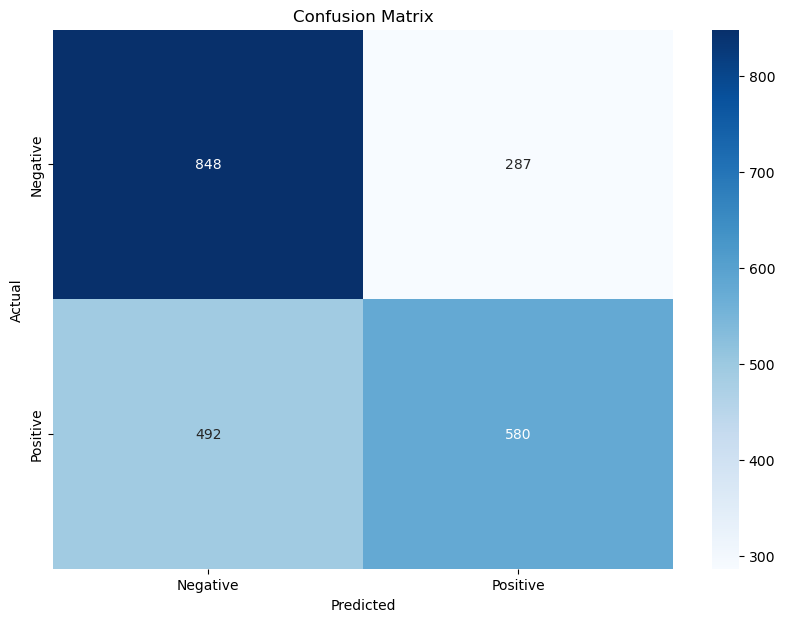

In [413]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div class="alert alert-block alert-info">
    <h1> Application Phase </h1>
</div>

In [415]:
# Take user input
user_input = input("Please enter your text: ").strip()

# Preprocess the user input
def preprocess_user_input(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

cleaned_input = preprocess_user_input(user_input)

Please enter your text: im author novels filled family drama romance


In [423]:
user_input, cleaned_input

('im author novels filled family drama romance',
 'im author novels filled family drama romance')

In [424]:
# Transform the cleaned input using the vectorizer
user_input_tfidf = loaded_vectorizer.transform([cleaned_input])

# Predict the gender of the user input
user_prediction = loaded_model.predict(user_input_tfidf)

# Output the prediction
print(f"The predicted gender for the input text is: {user_prediction[0]}")

The predicted gender for the input text is: female
